In [1]:
from sklearn import tree
import graphviz

## Decision Tree with scikit learn for Server Health check
We will train a decision tree to check if a server is healthy or not, based on our sample data against the current CPU, RAM and STORAGE % usage over the last 6 hours: 

In [2]:
# Average Usage in % for the last 6h: [CPU, RAM, STORAGE]

data = [ 
 ['healthy',  45, 32, 65], 
 ['unhealthy',  87,  67, 100], 
 ['unhealthy',  100, 1, 1], 
 ['unhealthy',  76, 70, 90], 
 ['unhealthy',  1, 1, 100], 
 ['unhealthy',  31, 100, 50], 
 ['healthy',  12, 65, 39], 
 ['healthy',  20, 10, 46], 
 ['unhealthy',  100, 50, 50], 
 ['healthy',  34, 70, 37], 
 ['healthy',  1, 50, 50],
 ['unhealthy',  50, 50, 100], 
 ['healthy',  50, 1, 50],
 ['unhealthy',  1, 100, 1], 
 ['healthy',  50, 50, 1],
 ['healthy',  53, 53, 80], 
]
# state to Y
states = [row[0] for row in data]
# metrics to X
metrics = [row[1:] for row in data]
print states
print metrics

['healthy', 'unhealthy', 'unhealthy', 'unhealthy', 'unhealthy', 'unhealthy', 'healthy', 'healthy', 'unhealthy', 'healthy', 'healthy', 'unhealthy', 'healthy', 'unhealthy', 'healthy', 'healthy']
[[45, 32, 65], [87, 67, 100], [100, 1, 1], [76, 70, 90], [1, 1, 100], [31, 100, 50], [12, 65, 39], [20, 10, 46], [100, 50, 50], [34, 70, 37], [1, 50, 50], [50, 50, 100], [50, 1, 50], [1, 100, 1], [50, 50, 1], [53, 53, 80]]


In [3]:
# Use a Decision Tree classifier for my tree
mytree = tree.DecisionTreeClassifier()

In [4]:
# train the Decision Tree with our data
mytree = mytree.fit(metrics, states)

# CHALLENGE compare their reusults and print the best one!
print("low CPU, RAM OK, LOW Storage: ") 
print(mytree.predict([[10, 80, 10]]))
print("high CPU and Storage: ") 
print(mytree.predict([[80, 10, 90]]))
print("high RAM usage: ") 
print(mytree.predict([[60, 90, 10]]))

low CPU, RAM OK, LOW Storage: 
['healthy']
high CPU and Storage: 
['unhealthy']
high RAM usage: 
['unhealthy']


In [5]:
# Visulize the decision tree
dot_data = tree.export_graphviz(mytree, 
                                feature_names=['CPU','RAM','Storage'],
                                class_names=['healthy','unhealthy'],
                                filled=True, rounded=True,
                                out_file=None) 

#### Next demo: http://localhost:8888/notebooks/final/hellotensorflow_intro.ipynb

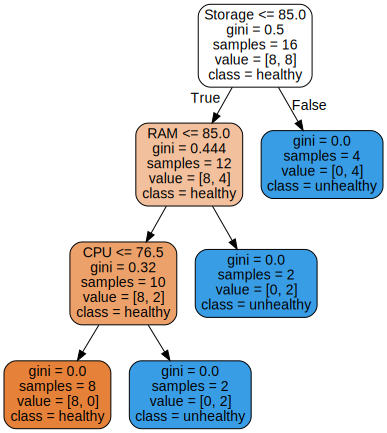

In [6]:
graphviz.Source(dot_data)